# **ASSIGNMENT - 3**


**QUESTION 1:**	Construct a sparse and a dense matrices of size 1000x1000

In [1]:
# importing necessary functions
import numpy as np
from scipy.sparse import isspmatrix
from numpy import count_nonzero

# Creating sparse matrix

# Position of non zero elements
row = np.array([0, 1, 1, 2, 2, 3, 3 ,4 ,4 ,5 ,5 ,6 ,6 ,7 ,7 ,8 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,10 ,17,18])
col = np.array([1, 0, 2, 1, 3, 2, 3 ,2 ,4 ,7 ,8 ,9 ,11 ,13 ,4 ,1 ,0 ,16 ,15 ,14 ,15 ,12 ,13 ,14 ,11 ,10 ,16,17])
    
# Creating sparse matrix of size 1000 X 1000
sparseMatrix=np.zeros([1000,1000])
for i,j in zip(row,col):
  sparseMatrix[i][j]=1

# Displaying the sparse matrix  
print('Sparse Matrix is \n',sparseMatrix)
print('***************************************')

# Calculate sparsity
sparsity = 1.0 - count_nonzero(sparseMatrix) / sparseMatrix.size
print('Sparsity of the matrix = ',sparsity)

# Calculate size
data_size = sparseMatrix.size/(1024**2)
print('Size of sparse matrix: '+ '%3.2f' %data_size + ' MB')

Sparse Matrix is 
 [[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
***************************************
Sparsity of the matrix =  0.999972
Size of sparse matrix: 0.95 MB


In [2]:
# Creating dense matrix 1000 X 1000
denseMatrix=np.random.randint(1,10,(1000,1000))
print('Dense Matrix is ',denseMatrix)
print('***************************************')

# calculate sparsity
sparsity = 1.0 - count_nonzero(denseMatrix) / denseMatrix.size
print('Sparsity of the above dense matrix is',sparsity)

# Calculate size
data_size = denseMatrix.size/(1024**2)
print('Size of dense matrix: '+ '%3.2f' %data_size + ' MB')

Dense Matrix is  [[8 9 7 ... 4 9 7]
 [3 9 2 ... 2 1 7]
 [5 1 9 ... 7 7 1]
 ...
 [6 3 6 ... 1 6 5]
 [5 7 4 ... 6 3 7]
 [7 5 6 ... 4 2 3]]
***************************************
Sparsity of the above dense matrix is 0.0
Size of dense matrix: 0.95 MB


**QUESTION 2:** Identify the data structure to store the given sparse matrices

The data structure used to store sparse matrix efficiently is **Adjacency List**.

An adjacency list represents a graph as an array of linked lists. The index of the array represents a vertex and each element in its linked list represents the other vertices that form an edge with the vertex.

It can represented as a simple dictionary of vertices and its edges is a sufficient representation of a graph.

**QUESTION 3:** Justify your selection of data structure

1. An adjacency list is efficient in terms of storage because we only need to store the values for the edges. For a sparse graph with millions of vertices and edges, this can save a lot of space.

2. It also helps to find all the vertices adjacent to a vertex easily.

3. It is faster to use adjacency lists for graphs having less number of edges.





**QUESTION 4:** Write a program to implement the data structure

In [3]:
# Adjacency List representation array of linked lists
tup=[]
for i in range(0,1000):
  for j in range(0,1000):
    if(sparseMatrix[i][j]==1):
      tu=int(i),int(j)
      tup.append(tu)

In [4]:
class AdjNode:
    def __init__(self, value):
        self.vertex = value
        self.next = None

class Graph:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V

    # Add edges
    def add_edge(self, s, d):
        node = AdjNode(d)
        node.next = self.graph[s]
        self.graph[s] = node

        node = AdjNode(s)
        node.next = self.graph[d]
        self.graph[d] = node

    # Print the adjacency list
    def print_agraph(self):
        d={}
        for i in range(self.V):
            print("Vertex " + str(i) + ":", end="")
            temp = self.graph[i]
            l=[]
            d1={}
            while temp:
                l.append(temp.vertex)
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            d1[i]=l
            l=[]
            d.update(d1)
            print(" \n")
        return d

if __name__ == "__main__":
    V = 19
    graph = Graph(V)
    for e in tup:
      graph.add_edge(e[0],e[1])

    #graph.print_agraph()
    s=graph.print_agraph()
    print('**************************************')
    print('Adjacency list:',s)

    # Calculate size
    #data_size = ((sys.getsizeof(s))/(1024**2))*1024
    #print('Size of adjacency list of sparse matrix: '+ '%3.2f' %data_size + ' KB')

Vertex 0: -> 8 -> 1 -> 1 

Vertex 1: -> 8 -> 2 -> 2 -> 0 -> 0 

Vertex 2: -> 4 -> 3 -> 3 -> 1 -> 1 

Vertex 3: -> 3 -> 3 -> 2 -> 2 

Vertex 4: -> 7 -> 4 -> 4 -> 2 

Vertex 5: -> 8 -> 7 

Vertex 6: -> 11 -> 9 

Vertex 7: -> 13 -> 4 -> 5 

Vertex 8: -> 1 -> 0 -> 5 

Vertex 9: -> 16 -> 6 

Vertex 10: -> 15 -> 10 -> 10 

Vertex 11: -> 16 -> 14 -> 6 

Vertex 12: -> 13 -> 15 

Vertex 13: -> 14 -> 12 -> 7 

Vertex 14: -> 15 -> 13 -> 11 

Vertex 15: -> 14 -> 12 -> 10 

Vertex 16: -> 17 -> 11 -> 9 

Vertex 17: -> 18 -> 16 

Vertex 18: -> 17 

**************************************
Adjacency list: {0: [8, 1, 1], 1: [8, 2, 2, 0, 0], 2: [4, 3, 3, 1, 1], 3: [3, 3, 2, 2], 4: [7, 4, 4, 2], 5: [8, 7], 6: [11, 9], 7: [13, 4, 5], 8: [1, 0, 5], 9: [16, 6], 10: [15, 10, 10], 11: [16, 14, 6], 12: [13, 15], 13: [14, 12, 7], 14: [15, 13, 11], 15: [14, 12, 10], 16: [17, 11, 9], 17: [18, 16], 18: [17]}


In [5]:
# Convert Adjacency matrix representation to Adjacency List dictionary of lists
from collections import defaultdict
import sys

def convert(a):
    adjList = defaultdict(list)
    for i in range(len(a)):
        for j in range(len(a[i])):
                       if a[i][j]== 1:
                           adjList[i].append(j)
    return adjList
 
# driver code
a = sparseMatrix # adjacency matrix
AdjList = convert(a)
print("Adjacency List:")

# print the adjacency list
for i in AdjList:
    print(i, end ="")
    for j in AdjList[i]:
        print(" -> {}".format(j), end ="")
    print()
print('**************************************')
print(AdjList)
# Calculate size
data_size = ((sys.getsizeof(AdjList))/(1024**2))*1024
print('Size of adjacencey list of sparse matrix: '+ '%3.2f' %data_size + ' KB')

Adjacency List:
0 -> 1
1 -> 0 -> 2
2 -> 1 -> 3
3 -> 2 -> 3
4 -> 2 -> 4
5 -> 7 -> 8
6 -> 9 -> 11
7 -> 4 -> 13
8 -> 0 -> 1
9 -> 16
10 -> 10 -> 15
11 -> 14
12 -> 15
13 -> 12
14 -> 13
15 -> 14
16 -> 11
17 -> 16
18 -> 17
**************************************
defaultdict(<class 'list'>, {0: [1], 1: [0, 2], 2: [1, 3], 3: [2, 3], 4: [2, 4], 5: [7, 8], 6: [9, 11], 7: [4, 13], 8: [0, 1], 9: [16], 10: [10, 15], 11: [14], 12: [15], 13: [12], 14: [13], 15: [14], 16: [11], 17: [16], 18: [17]})
Size of adjacencey list of sparse matrix: 0.63 KB


**QUESTION 5:** Write a function to visualize the sparse matrix in a graphical format 

[(0, 1), (0, 8), (1, 2), (1, 8), (2, 3), (2, 4), (3, 3), (4, 4), (4, 7), (5, 7), (5, 8), (7, 13), (6, 9), (6, 11), (9, 16), (11, 14), (11, 16), (13, 12), (13, 14), (16, 17), (10, 10), (10, 15), (15, 12), (15, 14), (17, 18)]


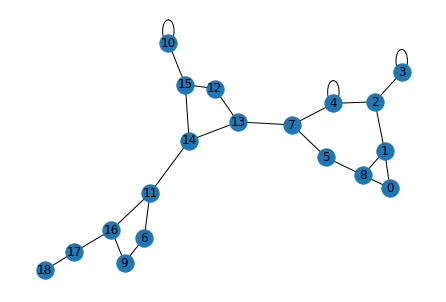

In [6]:
# visualizing graph using the adjacency list of form dictionary of lists
import networkx as nx
import matplotlib.pyplot as plt

graph = AdjList
edge = [] 

# Creating edges
for i in graph:
  for k in graph[i]:
    tup = int(i), int(k)
    edge.append(tup)

g = nx.Graph()

# Adding edges to the graph
for e in edge:
  g.add_edge(e[0], e[1])
print(g.edges)

nx.draw(g, with_labels = True)